<a href="https://colab.research.google.com/github/edllyn/acoesMGLU3/blob/main/PP3_A%C3%A7%C3%B5es_da_MGLU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [91]:
#dataBase
dataBase = pd.read_excel('/content/Vase_004 - Magalu - Sem Resolução.xlsx')
dataBase.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [92]:
#Dimension
dataBase.shape

(247, 7)

In [93]:
#dtype
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [94]:
#verification mean, std and min

dataBase.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [95]:
#time series

data = dataBase.set_index('Data')
data.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


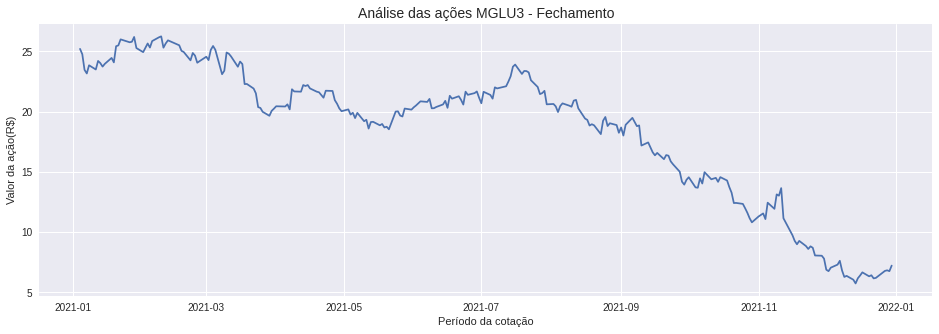

In [96]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações MGLU3 - Fechamento', fontsize=14)
plt.plot(data.index, data['Fechamento'])
plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação(R$)');

In [97]:
dataInicio = data.head()

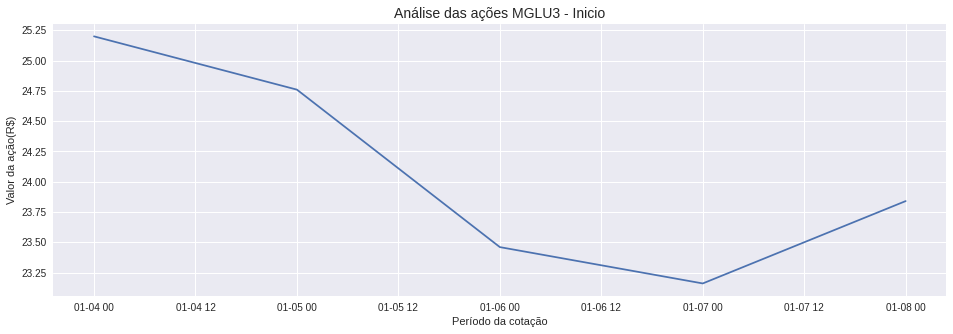

In [98]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações MGLU3 - Inicio', fontsize=14)
plt.plot(dataInicio.index, dataInicio['Fechamento'])
plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação(R$)');

In [99]:
dataFinal= data.tail()

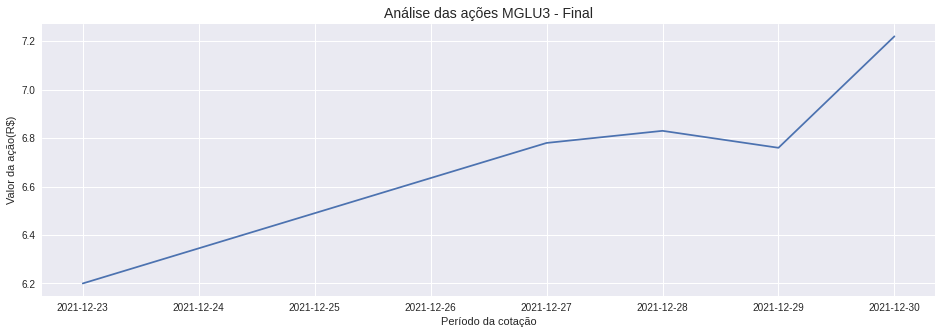

In [100]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das ações MGLU3 - Final', fontsize=14)
plt.plot(dataFinal.index, dataFinal['Fechamento'] )
plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação(R$)');

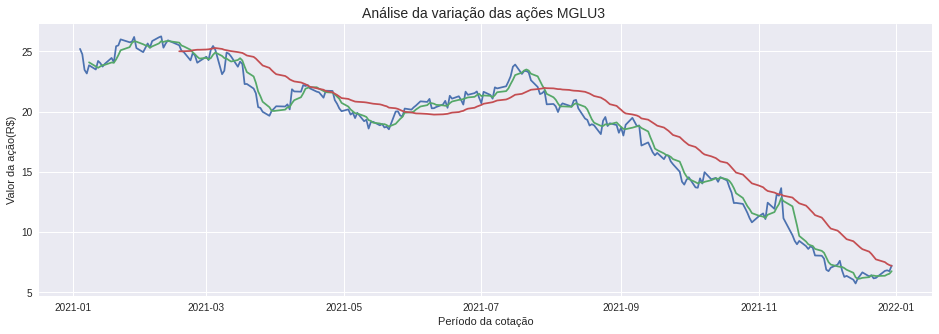

In [101]:
mediaMovel = data['Fechamento'].rolling(5).mean()
mediaTendencia = data['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise da variação das ações MGLU3 ', fontsize=14)

plt.plot(data.index, data['Fechamento'])
plt.plot(data.index, mediaMovel)
plt.plot(data.index, mediaTendencia)

plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação(R$)');

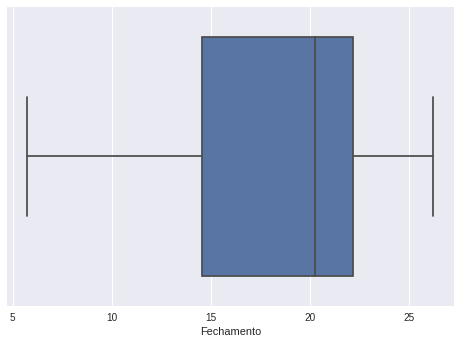

In [102]:
sns.boxplot(data=dataBase, x='Fechamento');

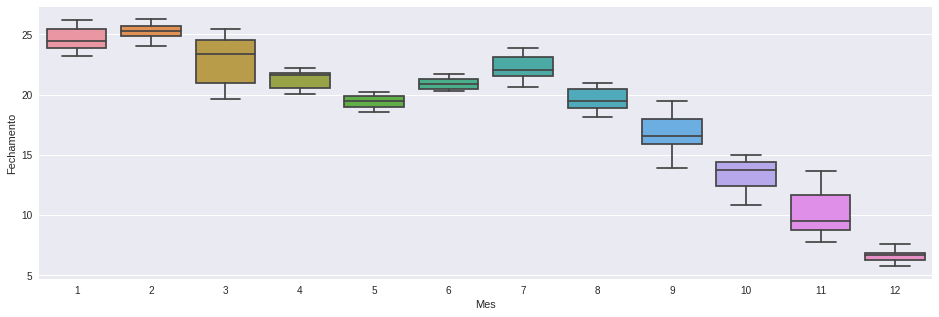

In [103]:
#month boxplot
dataBase['Mes'] = dataBase['Data'].dt.month
dataBase.head()

plt.figure(figsize=(16,5))
sns.boxplot(data=dataBase, x='Mes', y='Fechamento');

In [104]:
dataBase.groupby(['Mes']).describe()['Fechamento']

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000


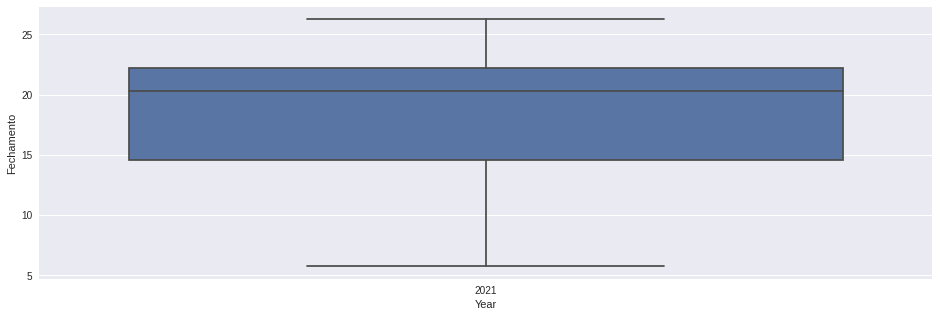

In [105]:
#year boxplot
dataBase['Year'] = dataBase['Data'].dt.year
dataBase.head()

plt.figure(figsize=(16,5))
sns.boxplot(data=dataBase, x='Year', y='Fechamento');

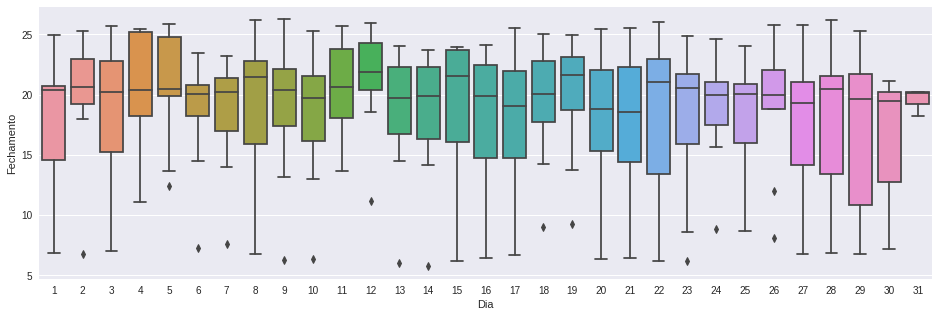

In [106]:
#day boxplot
dataBase['Dia'] = dataBase['Data'].dt.day
dataBase.head()


plt.figure(figsize=(16,5))
sns.boxplot(data=dataBase, x='Dia', y='Fechamento');

In [109]:
from matplotlib.axis import XAxis
#Graph

Graph = go.Figure(
    data = [
          go.Candlestick(
              x = data.index,
              open = data['Abertura'],
              high = data['Maior'],
              low = data['Menor'],
              close = data['Fechamento'],
          )
  ]
)

Graph.update_layout(xaxis_rangeslider_visible=False)

Graph.show()
